## Getting Data

In [1]:
X = [2.5,21,5.1,47,3.2,27,8.5,75,3.5,30,1.5,20,9.2,88,5.5,60,8.3,81,2.7,25,7.7,85,5.9,62,4.5,41,3.3,42,1.1,17,8.9,95,2.5,30,1.9,24,6.1,67,7.4,69,2.7,30,4.8,54,3.8,35,6.9,76,7.8,86]

### Note that we have coppied the data and pasted it in List X
### The values in odd no of places contains hours of study and values in even no of places contains marks obtained

##### Creating Two Lists with independent variable as hours of study and dependent variable as marks

In [7]:
ind_var = []
dep_var = []
for i in range (0,len(X)):
    if i%2==0:
        ind_var.append(X[i])
    else:
        dep_var.append(X[i])

In [24]:
print("All rows are classified properly") if len(X)-len(dep_var)-len(ind_var)==0 else print("Not classified")

All rows are classified properly


In [26]:
print("Indipendent variable are %i and dependent variable are %i"%(len(ind_var),len(dep_var)))

Indipendent variable are 25 and dependent variable are 25


### Check the distribution of plot to understand relationship

<AxesSubplot:>

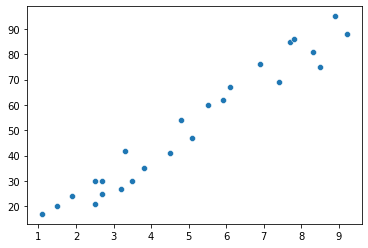

In [25]:
import seaborn as sns
sns.scatterplot(x=ind_var,y=dep_var)

## As we can see there is a Linear relationship between two variables

Now we can either use Gradient descent or use the formula to find regression Coefficient. 
Since the Data is Small we can use the given formula which will give us more accuracy

For a linear line y=mx+c in 2 dimensional plane the coefficent are given by 
m = SS_xy/SS_xx
c = avg(y) - m*avg(x)
Where SS_ab = sumation(ba) - n*avg(y)*avg(x)
To derive these coeeficient we can minimize the error term (y-pred - y-actual)^2 by differentiating and equating to 0


In [37]:
## Function to estimate coefficient
import numpy as np

def estimate_coef(x, y):
    x=np.array(ind_var)
    y=np.array(dep_var)
    # number of observations/points
    n = np.size(x)
  
    #mean of x and y vector
    avg_x = np.mean(x)
    avg_y = np.mean(y)
  
    #calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*avg_y*avg_x
    SS_xx = np.sum(x*x) - n*avg_x*avg_x
  
    # calculating regression coefficients
    m = SS_xy / SS_xx
    c = avg_y - m*avg_x
  
    return (m,c)

In [44]:
m = estimate_coef(ind_var,dep_var)[0]
c = estimate_coef(ind_var,dep_var)[1]

In [48]:
y_pred = m*np.array(ind_var) + np.array(c)
y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

#### Plotting the line and scattered points as well as R2 Score

R square value of the coefficent is 0.952948


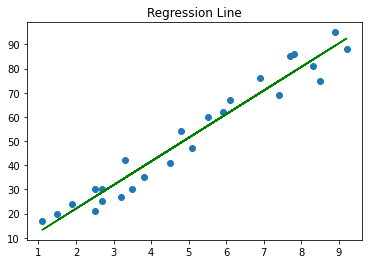

In [87]:
import matplotlib.pyplot as plt

plt.plot(ind_var, y_pred, color = "g")
plt.scatter(ind_var, dep_var)
plt.title('Regression Line')
corr_matrix = np.corrcoef(dep_var, y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq
print("R square value of the coefficent is %f"%R_sq)

### Residual Plot

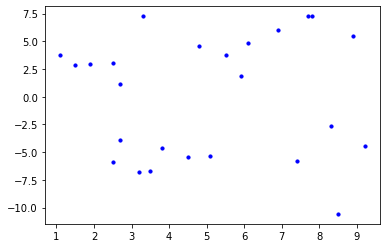

In [58]:
from sklearn import datasets, linear_model, metrics

plt.scatter(ind_var, dep_var - y_pred,
            color = "blue", s = 10, label = 'residuals ')

## Predict the marks based on no of hours 

In [99]:
a=float(input("Enter the hours of study"))
print("Score of a person who has studied for %f hours is %f"%(x,m*a+c))



Enter the hours of study9.25
Score of a person who has studied for 9.250000 hours is 92.909855
